In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [71]:
import pandas as pd
df_cust = pd.read_csv('BGCON_CUST_DATA.csv', encoding = 'utf-8', dtype={'RESI_TYPE_CODE':str})

In [72]:
# 범주형 변수에서 결측을 하나의 범주로 인정한다.
df_cust.fillna({'CTPR':'None'}, inplace=True)
df_cust.fillna({'OCCP_GRP_1':'None'}, inplace=True)
df_cust.fillna({'WEDD_YN':'None'}, inplace=True)

df_cust = df_cust[df_cust['SIU_CUST_YN'].notna()] # SIU_CUST_YN 이 없는 레코드 제외

In [73]:
df_cust.columns

Index(['CUST_ID', 'DIVIDED_SET', 'SIU_CUST_YN', 'SEX', 'AGE', 'RESI_COST',
       'RESI_TYPE_CODE', 'FP_CAREER', 'CUST_RGST', 'CTPR', 'OCCP_GRP_1',
       'OCCP_GRP_2', 'TOTALPREM', 'MINCRDT', 'MAXCRDT', 'WEDD_YN',
       'MATE_OCCP_GRP_1', 'MATE_OCCP_GRP_2', 'CHLD_CNT', 'LTBN_CHLD_AGE',
       'MAX_PAYM_YM', 'MAX_PRM', 'CUST_INCM', 'RCBASE_HSHD_INCM',
       'JPBASE_HSHD_INCM'],
      dtype='object')

In [74]:
df_cust = df_cust.astype({ 'CUST_RGST' : 'str' })

In [75]:
df_cust['year'] = df_cust['CUST_RGST'].apply(lambda x : x[0:4])

In [76]:
df_cust['month'] = df_cust['CUST_RGST'].apply(lambda x : x[4:6])

In [77]:
df_cust

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,...,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,year,month
0,1,1,N,2,47,21111,20,N,199910.0,충북,...,2차산업 종사자,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0,1999,10
1,2,1,N,1,53,40000,20,N,199910.0,서울,...,주부,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0,1999,10
2,3,1,N,1,60,0,NaN,N,199910.0,서울,...,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0,1999,10
3,4,1,N,2,64,12861,40,Y,199910.0,경기,...,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0,1999,10
4,5,1,N,2,54,0,NaN,Y,199910.0,광주,...,고위 공무원,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0,1999,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22394,875,1,Y,1,49,0,NaN,N,200306.0,경남,...,3차산업 종사자,2.0,16.0,NaN,NaN,5090.0,0,8373.0,2003,06
22396,21483,1,N,2,30,31944,20,N,200306.0,경기,...,NaN,0.0,0.0,NaN,NaN,0.0,9361,8947.0,2003,06
22397,21940,1,N,2,23,45972,20,N,200501.0,경기,...,NaN,0.0,0.0,NaN,NaN,0.0,11522,11484.0,2005,01
22398,20356,1,N,1,15,27777,20,N,200306.0,경기,...,NaN,0.0,0.0,NaN,NaN,NaN,7960,7614.0,2003,06


In [78]:
df_cust['datetime'] = df_cust['year'] + '-' + df_cust['month']+ '-' + '01'
df_cust['datetime']

0        1999-10-01
1        1999-10-01
2        1999-10-01
3        1999-10-01
4        1999-10-01
            ...    
22394    2003-06-01
22396    2003-06-01
22397    2005-01-01
22398    2003-06-01
22399    2003-06-01
Name: datetime, Length: 20607, dtype: object

In [79]:
df_cust.isnull().sum()

CUST_ID                 0
DIVIDED_SET             0
SIU_CUST_YN             0
SEX                     0
AGE                     0
RESI_COST               0
RESI_TYPE_CODE       1146
FP_CAREER               0
CUST_RGST               0
CTPR                    0
OCCP_GRP_1              0
OCCP_GRP_2            547
TOTALPREM            5321
MINCRDT              8766
MAXCRDT              8766
WEDD_YN                 0
MATE_OCCP_GRP_1     10885
MATE_OCCP_GRP_2     10885
CHLD_CNT              434
LTBN_CHLD_AGE         434
MAX_PAYM_YM          5966
MAX_PRM              5966
CUST_INCM            4823
RCBASE_HSHD_INCM        0
JPBASE_HSHD_INCM      616
year                    0
month                   0
datetime                0
dtype: int64

In [80]:
df_cust[df_cust['datetime'] == '2016-02-01']

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,...,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,year,month,datetime
4840,6761,1,N,2,28,6694,40,N,201602.0,경남,...,0.0,0.0,201603.0,241384.0,2764.0,5456,2764.0,2016,02,2016-02-01


In [81]:
df_cust['datetime'].unique()

array(['1999-10-01', '1999-11-01', '2000-03-01', '2000-11-01',
       '2001-02-01', '2001-03-01', '2001-04-01', '2001-05-01',
       '2001-06-01', '2001-07-01', '2001-08-01', '2001-09-01',
       '2001-10-01', '2001-11-01', '2001-12-01', '2002-01-01',
       '2002-03-01', '2002-05-01', '2002-06-01', '2002-07-01',
       '2002-08-01', '2002-09-01', '2002-10-01', '2002-11-01', 'nan--01',
       '1981-10-01', '1997-03-01', '1992-05-01', '1999-03-01',
       '1999-09-01', '1999-04-01', '1983-04-01', '1998-09-01',
       '1992-06-01', '1982-08-01', '1996-04-01', '1984-06-01',
       '1989-04-01', '1993-06-01', '1984-10-01', '1989-06-01',
       '1986-06-01', '1991-07-01', '2002-02-01', '1989-11-01',
       '1983-02-01', '1994-09-01', '2000-07-01', '2000-10-01',
       '1991-08-01', '1990-11-01', '1996-02-01', '1991-06-01',
       '1987-08-01', '2002-04-01', '1992-02-01', '2000-05-01',
       '1996-10-01', '1996-06-01', '1992-07-01', '1996-08-01',
       '1994-11-01', '1995-04-01', '1999-02-

In [82]:
df_cust['datetime']  = np.where(df_cust['datetime'] == '101.-0-01', '2023-06-01', df_cust['datetime'])

In [83]:
df_cust['datetime']  = np.where(df_cust['datetime'] == 'nan--01', '2023-06-01', df_cust['datetime'])

In [84]:
df_cust['datetime'] = pd.to_datetime(df_cust['datetime'])

In [85]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20607 entries, 0 to 22399
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CUST_ID           20607 non-null  int64         
 1   DIVIDED_SET       20607 non-null  int64         
 2   SIU_CUST_YN       20607 non-null  object        
 3   SEX               20607 non-null  int64         
 4   AGE               20607 non-null  int64         
 5   RESI_COST         20607 non-null  int64         
 6   RESI_TYPE_CODE    19461 non-null  object        
 7   FP_CAREER         20607 non-null  object        
 8   CUST_RGST         20607 non-null  object        
 9   CTPR              20607 non-null  object        
 10  OCCP_GRP_1        20607 non-null  object        
 11  OCCP_GRP_2        20060 non-null  object        
 12  TOTALPREM         15286 non-null  float64       
 13  MINCRDT           11841 non-null  float64       
 14  MAXCRDT           1184

In [86]:
import datetime as dt
df_cust['CUST_RGST_DAY'] = dt.datetime(2016,2,1) - df_cust['datetime']

In [87]:
df_cust['CUST_RGST_DAY'] = df_cust['CUST_RGST_DAY'].dt.days

In [88]:
df_cust['CUST_RGST_DAY']

0        5967
1        5967
2        5967
3        5967
4        5967
         ... 
22394    4628
22396    4628
22397    4048
22398    4628
22399    4628
Name: CUST_RGST_DAY, Length: 20607, dtype: int64

In [89]:
df_cust['CUST_RGST_DAY']  = np.where(df_cust['CUST_RGST_DAY'] == '-2677', '4367', df_cust['CUST_RGST_DAY'])

In [90]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20607 entries, 0 to 22399
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CUST_ID           20607 non-null  int64         
 1   DIVIDED_SET       20607 non-null  int64         
 2   SIU_CUST_YN       20607 non-null  object        
 3   SEX               20607 non-null  int64         
 4   AGE               20607 non-null  int64         
 5   RESI_COST         20607 non-null  int64         
 6   RESI_TYPE_CODE    19461 non-null  object        
 7   FP_CAREER         20607 non-null  object        
 8   CUST_RGST         20607 non-null  object        
 9   CTPR              20607 non-null  object        
 10  OCCP_GRP_1        20607 non-null  object        
 11  OCCP_GRP_2        20060 non-null  object        
 12  TOTALPREM         15286 non-null  float64       
 13  MINCRDT           11841 non-null  float64       
 14  MAXCRDT           1184

In [91]:
df_cust.columns

Index(['CUST_ID', 'DIVIDED_SET', 'SIU_CUST_YN', 'SEX', 'AGE', 'RESI_COST',
       'RESI_TYPE_CODE', 'FP_CAREER', 'CUST_RGST', 'CTPR', 'OCCP_GRP_1',
       'OCCP_GRP_2', 'TOTALPREM', 'MINCRDT', 'MAXCRDT', 'WEDD_YN',
       'MATE_OCCP_GRP_1', 'MATE_OCCP_GRP_2', 'CHLD_CNT', 'LTBN_CHLD_AGE',
       'MAX_PAYM_YM', 'MAX_PRM', 'CUST_INCM', 'RCBASE_HSHD_INCM',
       'JPBASE_HSHD_INCM', 'year', 'month', 'datetime', 'CUST_RGST_DAY'],
      dtype='object')

In [92]:
df_cust = df_cust.drop(['DIVIDED_SET','CUST_RGST', 'CTPR','OCCP_GRP_2','MATE_OCCP_GRP_1', 'MATE_OCCP_GRP_2', 'LTBN_CHLD_AGE',
       'MAX_PAYM_YM', 'MAX_PRM', 'CUST_INCM','JPBASE_HSHD_INCM', 'year', 'month', 'datetime'], axis=1)

In [93]:
df_cust

,CUST_ID,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,OCCP_GRP_1,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,CHLD_CNT,RCBASE_HSHD_INCM,CUST_RGST_DAY
0,1,N,2,47,21111,20,N,3.사무직,146980441.0,NaN,NaN,Y,2.0,10094,5967
1,2,N,1,53,40000,20,N,3.사무직,94600109.0,1.0,6.0,Y,2.0,9143,5967
2,3,N,1,60,0,NaN,N,5.서비스,18501269.0,NaN,NaN,N,0.0,0,5967
3,4,N,2,64,12861,40,Y,2.자영업,317223657.0,2.0,99.0,N,0.0,4270,5967
4,5,N,2,54,0,NaN,Y,2.자영업,10506072.0,8.0,8.0,Y,3.0,0,5967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22394,875,Y,1,49,0,NaN,N,5.서비스,NaN,NaN,NaN,Y,2.0,0,4628
22396,21483,N,2,30,31944,20,N,1.주부,NaN,NaN,NaN,N,0.0,9361,4628
22397,21940,N,2,23,45972,20,N,8.기타,NaN,6.0,6.0,N,0.0,11522,4048
22398,20356,N,1,15,27777,20,N,8.기타,NaN,NaN,NaN,N,0.0,7960,4628


In [94]:
df_cntt = pd.read_csv('BGCON_CNTT_DATA.csv', encoding = 'utf-8')

In [95]:
df_cntt = df_cntt.drop(['POLY_NO', 'IRKD_CODE_DTAL', 'IRKD_CODE_ITEM',
       'GOOD_CLSF_CDNM', 'CNTT_YM', 'REAL_PAYM_TERM',
       'SALE_CHNL_CODE', 'CNTT_STAT_CODE', 'EXPR_YM', 'EXTN_YM', 'LAPS_YM',
       'PAYM_CYCL_CODE', 'MAIN_INSR_AMT', 'SUM_ORIG_PREM', 'RECP_PUBL',
       'CNTT_RECP', 'MNTH_INCM_AMT', 'DISTANCE'], axis=1)
df_cntt.isnull().sum()

CUST_ID          0
CUST_ROLE        0
CLLT_FP_PRNO    82
dtype: int64

In [96]:
df_cntt

,CUST_ID,CUST_ROLE,CLLT_FP_PRNO
0,2805,1,4671.0
1,5658,1,5900.0
2,4583,1,5778.0
3,14363,1,4553.0
4,1222,0,3366.0
...,...,...,...
113005,12297,1,4033.0
113006,9296,1,4023.0
113007,20517,1,4033.0
113008,1316,1,2309.0


In [97]:
import pickle
with open("join_cnt.pickle","rb") as fr:
    join_cnt = pickle.load(fr)

In [98]:
join_cnt

,CUST_ID,count(CUST_ID),SIU_CUST_YN
0,1,34,N
1,2,38,N
2,3,2,N
3,4,108,N
4,5,5,N
...,...,...,...
20602,22396,2,N
20603,22397,1,N
20604,22398,3,N
20605,22399,4,N


In [99]:
join_cnt = join_cnt.rename(columns={'count(CUST_ID)':'join'})

In [100]:
join_cnt

,CUST_ID,join,SIU_CUST_YN
0,1,34,N
1,2,38,N
2,3,2,N
3,4,108,N
4,5,5,N
...,...,...,...
20602,22396,2,N
20603,22397,1,N
20604,22398,3,N
20605,22399,4,N


In [101]:
join_cnt = join_cnt.drop(['SIU_CUST_YN'], axis=1)
join_cnt

,CUST_ID,join
0,1,34
1,2,38
2,3,2
3,4,108
4,5,5
...,...,...
20602,22396,2
20603,22397,1
20604,22398,3
20605,22399,4


In [102]:
import pickle
with open("risk_df.pickle","rb") as fr:
    risk_df = pickle.load(fr)

In [103]:
risk_df

,CLLT_FP_PRNO,risk
0,25053.0,100
1,50.0,88
2,20622.0,85
3,163.0,76
4,28242.0,73
5,55.0,68
6,16254.0,64
7,120.0,59
8,30068.0,58
9,9749.0,56


In [104]:
df_cntt = pd.merge(df_cntt, join_cnt, on = 'CUST_ID', how = 'inner')

In [105]:
df_cntt

,CUST_ID,CUST_ROLE,CLLT_FP_PRNO,join
0,2805,1,4671.0,2
1,2805,2,71.0,2
2,5658,1,5900.0,7
3,5658,5,5900.0,7
4,5658,1,5900.0,7
...,...,...,...,...
104009,9873,1,29488.0,2
104010,9873,1,29488.0,2
104011,2892,2,31477.0,1
104012,18136,2,2216.0,1


In [106]:
df_cntt = pd.merge(df_cntt, risk_df, on = 'CLLT_FP_PRNO', how = 'left')

In [107]:
df_cntt

,CUST_ID,CUST_ROLE,CLLT_FP_PRNO,join,risk
0,2805,1,4671.0,2,NaN
1,2805,2,71.0,2,25.0
2,5658,1,5900.0,7,NaN
3,5658,5,5900.0,7,NaN
4,5658,1,5900.0,7,NaN
...,...,...,...,...,...
104009,9873,1,29488.0,2,NaN
104010,9873,1,29488.0,2,NaN
104011,2892,2,31477.0,1,NaN
104012,18136,2,2216.0,1,NaN


In [108]:
df_cntt.isnull().sum()

CUST_ID             0
CUST_ROLE           0
CLLT_FP_PRNO       72
join                0
risk            98011
dtype: int64

In [109]:
import pickle
with open("claim_cnt.pickle","rb") as fr:
    claim_cnt = pickle.load(fr)

In [110]:
claim_cnt

,CUST_ID,count(CUST_ID),SIU_CUST_YN
0,1,4,N
1,2,3,N
2,3,1,N
3,4,9,N
4,5,1,N
...,...,...,...
20602,22396,3,N
20603,22397,1,N
20604,22398,2,N
20605,22399,1,N


In [111]:
claim_cnt = claim_cnt.rename(columns={'count(CUST_ID)':'claim'})

In [112]:
claim_cnt

,CUST_ID,claim,SIU_CUST_YN
0,1,4,N
1,2,3,N
2,3,1,N
3,4,9,N
4,5,1,N
...,...,...,...
20602,22396,3,N
20603,22397,1,N
20604,22398,2,N
20605,22399,1,N


In [113]:
claim_cnt = claim_cnt.drop(['SIU_CUST_YN'], axis=1)
claim_cnt

,CUST_ID,claim
0,1,4
1,2,3
2,3,1
3,4,9
4,5,1
...,...,...
20602,22396,3
20603,22397,1
20604,22398,2
20605,22399,1


In [114]:
df_cntt = pd.merge(df_cntt, claim_cnt, on = 'CUST_ID', how = 'inner')

In [115]:
df_cntt

,CUST_ID,CUST_ROLE,CLLT_FP_PRNO,join,risk,claim
0,2805,1,4671.0,2,NaN,7
1,2805,2,71.0,2,25.0,7
2,5658,1,5900.0,7,NaN,2
3,5658,5,5900.0,7,NaN,2
4,5658,1,5900.0,7,NaN,2
...,...,...,...,...,...,...
104009,9873,1,29488.0,2,NaN,1
104010,9873,1,29488.0,2,NaN,1
104011,2892,2,31477.0,1,NaN,7
104012,18136,2,2216.0,1,NaN,2


In [116]:
df_claim = pd.read_csv('BGCON_CLAIM_DATA.csv', encoding = 'utf-8', dtype={'HOSP_SPEC_DVSN':str})

In [117]:
df_claim.columns

Index(['CUST_ID', 'POLY_NO', 'ACCI_OCCP_GRP1', 'ACCI_OCCP_GRP2', 'CHANG_FP_YN',
       'CNTT_RECP_SQNO', 'RECP_DATE', 'ORIG_RESN_DATE', 'RESN_DATE',
       'CRNT_PROG_DVSN', 'ACCI_DVSN', 'CAUS_CODE', 'CAUS_CODE_DTAL',
       'DSAS_NAME', 'DMND_RESN_CODE', 'DMND_RSCD_SQNO', 'HOSP_OTPA_STDT',
       'HOSP_OTPA_ENDT', 'RESL_CD1', 'RESL_NM1', 'VLID_HOSP_OTDA',
       'HOUSE_HOSP_DIST', 'HOSP_CODE', 'ACCI_HOSP_ADDR', 'HOSP_SPEC_DVSN',
       'CHME_LICE_NO', 'PAYM_DATE', 'DMND_AMT', 'PAYM_AMT', 'PMMI_DLNG_YN',
       'SELF_CHAM', 'NON_PAY', 'TAMT_SFCA', 'PATT_CHRG_TOTA', 'DSCT_AMT',
       'COUNT_TRMT_ITEM', 'DCAF_CMPS_XCPA', 'NON_PAY_RATIO', 'HEED_HOSP_YN'],
      dtype='object')

In [118]:
df_claim = df_claim.drop(['POLY_NO', 'ACCI_OCCP_GRP1', 'ACCI_OCCP_GRP2', 'CHANG_FP_YN',
       'CNTT_RECP_SQNO', 'RECP_DATE', 'ORIG_RESN_DATE', 'RESN_DATE',
       'CRNT_PROG_DVSN', 'CAUS_CODE', 'CAUS_CODE_DTAL',
       'DSAS_NAME', 'DMND_RSCD_SQNO', 'HOSP_OTPA_STDT',
       'HOSP_OTPA_ENDT', 'RESL_CD1', 'RESL_NM1',
       'HOUSE_HOSP_DIST', 'HOSP_CODE', 'ACCI_HOSP_ADDR',
       'CHME_LICE_NO', 'PAYM_DATE', 'DMND_AMT', 'PAYM_AMT',
       'SELF_CHAM', 'NON_PAY', 'TAMT_SFCA', 'PATT_CHRG_TOTA', 'DSCT_AMT',
       'COUNT_TRMT_ITEM', 'DCAF_CMPS_XCPA', 'NON_PAY_RATIO'], axis=1)
df_claim.isnull().sum()

CUST_ID           0
ACCI_DVSN         0
DMND_RESN_CODE    0
VLID_HOSP_OTDA    0
HOSP_SPEC_DVSN    9
PMMI_DLNG_YN      0
HEED_HOSP_YN      0
dtype: int64

In [119]:
df_claim

,CUST_ID,ACCI_DVSN,DMND_RESN_CODE,VLID_HOSP_OTDA,HOSP_SPEC_DVSN,PMMI_DLNG_YN,HEED_HOSP_YN
0,5936,1,3,2,95,N,N
1,5936,1,3,2,95,N,N
2,5936,1,3,2,95,N,N
3,1043,3,2,6,95,N,N
4,8545,3,5,0,30,N,N
...,...,...,...,...,...,...,...
119015,15545,3,3,4,20,Y,N
119016,15489,1,3,1,30,Y,N
119017,6864,3,2,10,20,Y,N
119018,15545,3,3,1,20,Y,N


In [120]:
df_cust = pd.merge(df_cust, df_claim, on = 'CUST_ID', how = 'inner')
df_cust

,CUST_ID,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,OCCP_GRP_1,TOTALPREM,MINCRDT,...,WEDD_YN,CHLD_CNT,RCBASE_HSHD_INCM,CUST_RGST_DAY,ACCI_DVSN,DMND_RESN_CODE,VLID_HOSP_OTDA,HOSP_SPEC_DVSN,PMMI_DLNG_YN,HEED_HOSP_YN
0,1,N,2,47,21111,20,N,3.사무직,146980441.0,NaN,...,Y,2.0,10094,5967,3,3,2,10,Y,N
1,1,N,2,47,21111,20,N,3.사무직,146980441.0,NaN,...,Y,2.0,10094,5967,3,3,1,30,Y,N
2,1,N,2,47,21111,20,N,3.사무직,146980441.0,NaN,...,Y,2.0,10094,5967,3,3,1,30,Y,N
3,1,N,2,47,21111,20,N,3.사무직,146980441.0,NaN,...,Y,2.0,10094,5967,3,3,1,30,Y,N
4,2,N,1,53,40000,20,N,3.사무직,94600109.0,1.0,...,Y,2.0,9143,5967,3,3,1,20,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109768,21940,N,2,23,45972,20,N,8.기타,NaN,6.0,...,N,0.0,11522,4048,3,2,5,10,Y,N
109769,20356,N,1,15,27777,20,N,8.기타,NaN,NaN,...,N,0.0,7960,4628,3,5,0,10,N,N
109770,20356,N,1,15,27777,20,N,8.기타,NaN,NaN,...,N,0.0,7960,4628,3,2,4,10,N,N
109771,17118,N,2,18,21527,20,N,8.기타,NaN,NaN,...,N,0.0,7746,4628,3,2,4,20,N,N


In [121]:
df_cust = pd.merge(df_cust, df_cntt, on = 'CUST_ID', how = 'inner')
df_cust

,CUST_ID,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,OCCP_GRP_1,TOTALPREM,MINCRDT,...,DMND_RESN_CODE,VLID_HOSP_OTDA,HOSP_SPEC_DVSN,PMMI_DLNG_YN,HEED_HOSP_YN,CUST_ROLE,CLLT_FP_PRNO,join,risk,claim
0,1,N,2,47,21111,20,N,3.사무직,146980441.0,NaN,...,3,2,10,Y,N,1,24392.0,34,NaN,4
1,1,N,2,47,21111,20,N,3.사무직,146980441.0,NaN,...,3,2,10,Y,N,1,17.0,34,NaN,4
2,1,N,2,47,21111,20,N,3.사무직,146980441.0,NaN,...,3,2,10,Y,N,2,27344.0,34,NaN,4
3,1,N,2,47,21111,20,N,3.사무직,146980441.0,NaN,...,3,2,10,Y,N,1,26646.0,34,NaN,4
4,1,N,2,47,21111,20,N,3.사무직,146980441.0,NaN,...,3,2,10,Y,N,1,28576.0,34,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661468,20356,N,1,15,27777,20,N,8.기타,NaN,NaN,...,2,4,10,N,N,2,793.0,1,NaN,2
661469,17118,N,2,18,21527,20,N,8.기타,NaN,NaN,...,2,4,20,N,N,5,16040.0,2,NaN,2
661470,17118,N,2,18,21527,20,N,8.기타,NaN,NaN,...,2,4,20,N,N,2,20667.0,2,NaN,2
661471,17118,N,2,18,21527,20,N,8.기타,NaN,NaN,...,5,0,20,N,N,5,16040.0,2,NaN,2


In [122]:
df_cust.isnull().sum()

CUST_ID                  0
SIU_CUST_YN              0
SEX                      0
AGE                      0
RESI_COST                0
RESI_TYPE_CODE       23148
FP_CAREER                0
OCCP_GRP_1               0
TOTALPREM            75082
MINCRDT             183975
MAXCRDT             183975
WEDD_YN                  0
CHLD_CNT             15218
RCBASE_HSHD_INCM         0
CUST_RGST_DAY            0
ACCI_DVSN                0
DMND_RESN_CODE           0
VLID_HOSP_OTDA           0
HOSP_SPEC_DVSN          41
PMMI_DLNG_YN             0
HEED_HOSP_YN             0
CUST_ROLE                0
CLLT_FP_PRNO           570
join                     0
risk                616635
claim                    0
dtype: int64

In [123]:
def miss2mean(X):
    mean_value = df_cust[X].mean()
    df_cust[X].fillna(value=mean_value, inplace=True)

In [124]:
miss2mean('TOTALPREM')
miss2mean('MINCRDT')
miss2mean('MAXCRDT')
miss2mean('CHLD_CNT')

In [125]:
df_cust.isnull().sum()

CUST_ID                  0
SIU_CUST_YN              0
SEX                      0
AGE                      0
RESI_COST                0
RESI_TYPE_CODE       23148
FP_CAREER                0
OCCP_GRP_1               0
TOTALPREM                0
MINCRDT                  0
MAXCRDT                  0
WEDD_YN                  0
CHLD_CNT                 0
RCBASE_HSHD_INCM         0
CUST_RGST_DAY            0
ACCI_DVSN                0
DMND_RESN_CODE           0
VLID_HOSP_OTDA           0
HOSP_SPEC_DVSN          41
PMMI_DLNG_YN             0
HEED_HOSP_YN             0
CUST_ROLE                0
CLLT_FP_PRNO           570
join                     0
risk                616635
claim                    0
dtype: int64

In [126]:
df_cust['risk'] = df_cust['risk'].fillna(0)

In [127]:
df_cust[df_cust['risk'] > 25]

,CUST_ID,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,OCCP_GRP_1,TOTALPREM,MINCRDT,...,DMND_RESN_CODE,VLID_HOSP_OTDA,HOSP_SPEC_DVSN,PMMI_DLNG_YN,HEED_HOSP_YN,CUST_ROLE,CLLT_FP_PRNO,join,risk,claim
9,1,N,2,47,21111,20,N,3.사무직,146980441.0,5.471824,...,3,2,10,Y,N,2,163.0,34,76.0,4
10,1,N,2,47,21111,20,N,3.사무직,146980441.0,5.471824,...,3,2,10,Y,N,2,163.0,34,76.0,4
11,1,N,2,47,21111,20,N,3.사무직,146980441.0,5.471824,...,3,2,10,Y,N,2,163.0,34,76.0,4
13,1,N,2,47,21111,20,N,3.사무직,146980441.0,5.471824,...,3,2,10,Y,N,2,163.0,34,76.0,4
16,1,N,2,47,21111,20,N,3.사무직,146980441.0,5.471824,...,3,2,10,Y,N,2,163.0,34,76.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661355,20276,Y,1,56,1298,13,N,2.자영업,380800.0,6.000000,...,5,0,20,N,N,2,26772.0,4,43.0,6
661358,20276,Y,1,56,1298,13,N,2.자영업,380800.0,6.000000,...,6,0,30,N,N,2,26772.0,4,43.0,6
661359,20276,Y,1,56,1298,13,N,2.자영업,380800.0,6.000000,...,6,0,30,N,N,2,26772.0,4,43.0,6
661362,20276,Y,1,56,1298,13,N,2.자영업,380800.0,6.000000,...,6,0,30,N,N,2,26772.0,4,43.0,6


In [128]:
df_cust.isnull().sum()

CUST_ID                 0
SIU_CUST_YN             0
SEX                     0
AGE                     0
RESI_COST               0
RESI_TYPE_CODE      23148
FP_CAREER               0
OCCP_GRP_1              0
TOTALPREM               0
MINCRDT                 0
MAXCRDT                 0
WEDD_YN                 0
CHLD_CNT                0
RCBASE_HSHD_INCM        0
CUST_RGST_DAY           0
ACCI_DVSN               0
DMND_RESN_CODE          0
VLID_HOSP_OTDA          0
HOSP_SPEC_DVSN         41
PMMI_DLNG_YN            0
HEED_HOSP_YN            0
CUST_ROLE               0
CLLT_FP_PRNO          570
join                    0
risk                    0
claim                   0
dtype: int64

In [129]:
df_cust['RESI_TYPE_CODE'] = df_cust['RESI_TYPE_CODE'].fillna('unknown')

In [131]:
df_cust['HOSP_SPEC_DVSN'] = df_cust['HOSP_SPEC_DVSN'].fillna('unknown')

In [132]:
df_cust.isnull().sum()

CUST_ID               0
SIU_CUST_YN           0
SEX                   0
AGE                   0
RESI_COST             0
RESI_TYPE_CODE        0
FP_CAREER             0
OCCP_GRP_1            0
TOTALPREM             0
MINCRDT               0
MAXCRDT               0
WEDD_YN               0
CHLD_CNT              0
RCBASE_HSHD_INCM      0
CUST_RGST_DAY         0
ACCI_DVSN             0
DMND_RESN_CODE        0
VLID_HOSP_OTDA        0
HOSP_SPEC_DVSN        0
PMMI_DLNG_YN          0
HEED_HOSP_YN          0
CUST_ROLE             0
CLLT_FP_PRNO        570
join                  0
risk                  0
claim                 0
dtype: int64

In [133]:
df_cust = df_cust.drop(['CLLT_FP_PRNO'], axis=1)

In [134]:
df_cust.isnull().sum()

CUST_ID             0
SIU_CUST_YN         0
SEX                 0
AGE                 0
RESI_COST           0
RESI_TYPE_CODE      0
FP_CAREER           0
OCCP_GRP_1          0
TOTALPREM           0
MINCRDT             0
MAXCRDT             0
WEDD_YN             0
CHLD_CNT            0
RCBASE_HSHD_INCM    0
CUST_RGST_DAY       0
ACCI_DVSN           0
DMND_RESN_CODE      0
VLID_HOSP_OTDA      0
HOSP_SPEC_DVSN      0
PMMI_DLNG_YN        0
HEED_HOSP_YN        0
CUST_ROLE           0
join                0
risk                0
claim               0
dtype: int64

In [135]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [136]:
df_cust.dtypes

CUST_ID               int64
SIU_CUST_YN          object
SEX                   int64
AGE                   int64
RESI_COST             int64
RESI_TYPE_CODE       object
FP_CAREER            object
OCCP_GRP_1           object
TOTALPREM           float64
MINCRDT             float64
MAXCRDT             float64
WEDD_YN              object
CHLD_CNT            float64
RCBASE_HSHD_INCM      int64
CUST_RGST_DAY        object
ACCI_DVSN             int64
DMND_RESN_CODE        int64
VLID_HOSP_OTDA        int64
HOSP_SPEC_DVSN       object
PMMI_DLNG_YN         object
HEED_HOSP_YN         object
CUST_ROLE             int64
join                  int64
risk                float64
claim                 int64
dtype: object

In [137]:
df_cust['CUST_RGST_DAY'] = df_cust['CUST_RGST_DAY'].astype(int)

In [138]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_cust['SIU_CUST_YN'] = encoder.fit_transform(df_cust['SIU_CUST_YN'])
df_cust['RESI_TYPE_CODE'] = encoder.fit_transform(df_cust['RESI_TYPE_CODE'])
df_cust['FP_CAREER'] = encoder.fit_transform(df_cust['FP_CAREER'])
df_cust['OCCP_GRP_1'] = encoder.fit_transform(df_cust['OCCP_GRP_1'])
df_cust['HOSP_SPEC_DVSN'] = encoder.fit_transform(df_cust['HOSP_SPEC_DVSN'])
df_cust['WEDD_YN'] = encoder.fit_transform(df_cust['WEDD_YN'])
df_cust['PMMI_DLNG_YN'] = encoder.fit_transform(df_cust['PMMI_DLNG_YN'])
df_cust['HEED_HOSP_YN'] = encoder.fit_transform(df_cust['HEED_HOSP_YN'])

In [139]:
df_cust.dtypes

CUST_ID               int64
SIU_CUST_YN           int32
SEX                   int64
AGE                   int64
RESI_COST             int64
RESI_TYPE_CODE        int32
FP_CAREER             int32
OCCP_GRP_1            int32
TOTALPREM           float64
MINCRDT             float64
MAXCRDT             float64
WEDD_YN               int32
CHLD_CNT            float64
RCBASE_HSHD_INCM      int64
CUST_RGST_DAY         int32
ACCI_DVSN             int64
DMND_RESN_CODE        int64
VLID_HOSP_OTDA        int64
HOSP_SPEC_DVSN        int32
PMMI_DLNG_YN          int32
HEED_HOSP_YN          int32
CUST_ROLE             int64
join                  int64
risk                float64
claim                 int64
dtype: object

In [140]:
df_cust

,CUST_ID,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,OCCP_GRP_1,TOTALPREM,MINCRDT,...,ACCI_DVSN,DMND_RESN_CODE,VLID_HOSP_OTDA,HOSP_SPEC_DVSN,PMMI_DLNG_YN,HEED_HOSP_YN,CUST_ROLE,join,risk,claim
0,1,0,2,47,21111,3,0,2,1.469804e+08,5.471824,...,3,3,2,0,1,0,1,34,0.0,4
1,1,0,2,47,21111,3,0,2,1.469804e+08,5.471824,...,3,3,2,0,1,0,1,34,0.0,4
2,1,0,2,47,21111,3,0,2,1.469804e+08,5.471824,...,3,3,2,0,1,0,2,34,0.0,4
3,1,0,2,47,21111,3,0,2,1.469804e+08,5.471824,...,3,3,2,0,1,0,1,34,0.0,4
4,1,0,2,47,21111,3,0,2,1.469804e+08,5.471824,...,3,3,2,0,1,0,1,34,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661468,20356,0,1,15,27777,3,0,7,8.163505e+07,5.471824,...,3,2,4,0,0,0,2,1,0.0,2
661469,17118,0,2,18,21527,3,0,7,8.163505e+07,5.471824,...,3,2,4,1,0,0,5,2,0.0,2
661470,17118,0,2,18,21527,3,0,7,8.163505e+07,5.471824,...,3,2,4,1,0,0,2,2,0.0,2
661471,17118,0,2,18,21527,3,0,7,8.163505e+07,5.471824,...,3,5,0,1,0,0,5,2,0.0,2


In [141]:
df_cust = df_cust.drop(['CUST_ID'], axis=1)

In [144]:
df_cust

,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,OCCP_GRP_1,TOTALPREM,MINCRDT,MAXCRDT,...,ACCI_DVSN,DMND_RESN_CODE,VLID_HOSP_OTDA,HOSP_SPEC_DVSN,PMMI_DLNG_YN,HEED_HOSP_YN,CUST_ROLE,join,risk,claim
0,0,2,47,21111,3,0,2,1.469804e+08,5.471824,31.728344,...,3,3,2,0,1,0,1,34,0.0,4
1,0,2,47,21111,3,0,2,1.469804e+08,5.471824,31.728344,...,3,3,2,0,1,0,1,34,0.0,4
2,0,2,47,21111,3,0,2,1.469804e+08,5.471824,31.728344,...,3,3,2,0,1,0,2,34,0.0,4
3,0,2,47,21111,3,0,2,1.469804e+08,5.471824,31.728344,...,3,3,2,0,1,0,1,34,0.0,4
4,0,2,47,21111,3,0,2,1.469804e+08,5.471824,31.728344,...,3,3,2,0,1,0,1,34,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661468,0,1,15,27777,3,0,7,8.163505e+07,5.471824,31.728344,...,3,2,4,0,0,0,2,1,0.0,2
661469,0,2,18,21527,3,0,7,8.163505e+07,5.471824,31.728344,...,3,2,4,1,0,0,5,2,0.0,2
661470,0,2,18,21527,3,0,7,8.163505e+07,5.471824,31.728344,...,3,2,4,1,0,0,2,2,0.0,2
661471,0,2,18,21527,3,0,7,8.163505e+07,5.471824,31.728344,...,3,5,0,1,0,0,5,2,0.0,2


In [1]:
with open("model_df.pickle","wb") as fw:
    pickle.dump(df_cust, fw)

NameError: name 'pickle' is not defined

# 모델 적합

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import pickle
with open("model_df.pickle","rb") as fr:
    df_cust = pickle.load(fr)
print(df_cust)

        SIU_CUST_YN  SEX  AGE  RESI_COST  RESI_TYPE_CODE  FP_CAREER  \
0                 0    2   47      21111               3          0   
1                 0    2   47      21111               3          0   
2                 0    2   47      21111               3          0   
3                 0    2   47      21111               3          0   
4                 0    2   47      21111               3          0   
...             ...  ...  ...        ...             ...        ...   
661468            0    1   15      27777               3          0   
661469            0    2   18      21527               3          0   
661470            0    2   18      21527               3          0   
661471            0    2   18      21527               3          0   
661472            0    2   18      21527               3          0   

        OCCP_GRP_1     TOTALPREM   MINCRDT    MAXCRDT  ...  ACCI_DVSN  \
0                2  1.469804e+08  5.471824  31.728344  ...          3   
1

In [4]:
df_cust.columns

Index(['SIU_CUST_YN', 'SEX', 'AGE', 'RESI_COST', 'RESI_TYPE_CODE', 'FP_CAREER',
       'OCCP_GRP_1', 'TOTALPREM', 'MINCRDT', 'MAXCRDT', 'WEDD_YN', 'CHLD_CNT',
       'RCBASE_HSHD_INCM', 'CUST_RGST_DAY', 'ACCI_DVSN', 'DMND_RESN_CODE',
       'VLID_HOSP_OTDA', 'HOSP_SPEC_DVSN', 'PMMI_DLNG_YN', 'HEED_HOSP_YN',
       'CUST_ROLE', 'join', 'risk', 'claim'],
      dtype='object')

# 기본 전처리

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,mean_squared_log_error,r2_score

X = df_cust.drop(['SIU_CUST_YN'], axis = 1)
y = df_cust['SIU_CUST_YN']

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)


In [6]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    tn, fp, fn, tp = confusion.ravel()
    specificity = tn/(tn+fp)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('특이도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(specificity, precision, recall, f1, roc_auc))

In [7]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [8]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

# smote 준비

In [9]:
import imblearn

print(imblearn.__version__)

0.10.1


In [10]:
y_train_scaled.value_counts()

0    408676
1    120502
Name: SIU_CUST_YN, dtype: int64

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train_scaled, y_train_scaled)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train_scaled.shape, y_train_scaled.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (529178, 23) (529178,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (817352, 23) (817352,)
SMOTE 적용 후 레이블 값 분포: 
 0    408676
1    408676
Name: SIU_CUST_YN, dtype: int64


# 랜덤포레스트 smote 적용 전

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8)
rf_clf.fit(X_train_scaled , y_train_scaled)
pred_rf = rf_clf.predict(X_test_scaled)
pred_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

get_clf_eval(y_test_scaled , pred_rf, pred_proba_rf)

오차 행렬
[[100557   1612]
 [ 12178  17948]]
특이도: 0.9842, 정밀도: 0.9176, 재현율: 0.5958,    F1: 0.7225, AUC:0.9343


In [152]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24], 
    'min_samples_split': [16, 24]
}

grid_cv = GridSearchCV(rf_clf, param_grid=params, scoring=make_scorer(f1_score), cv=5, verbose=1)
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 F1 score 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV 최고 F1 score 수치:0.9872
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 24, 'min_samples_split': 16}


In [18]:
rf_clf_be = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=24,min_samples_split= 16 )
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(rf_clf_be, ftr_train=X_train_over, ftr_test=X_test_scaled, tgt_train=y_train_over, tgt_test=y_test_scaled)

오차 행렬
[[102076     93]
 [   312  29814]]
특이도: 0.9991, 정밀도: 0.9969, 재현율: 0.9896,    F1: 0.9933, AUC:0.9999


In [19]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(rf_clf_be, X_scaled, y, cv = 3, n_jobs=-1, scoring='f1')
scores

pd.DataFrame(cross_validate(rf_clf_be, X_scaled, y, cv = 3))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.5342846187259509


# 랜덤포레스트 smote 적용후

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_af_1 = RandomForestClassifier(n_estimators=100, random_state=0)
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(rf_clf_af_1, ftr_train=X_train_over, ftr_test=X_test_scaled, tgt_train=y_train_over, tgt_test=y_test_scaled)


오차 행렬
[[87993 14176]
 [ 4096 26030]]
특이도: 0.8612, 정밀도: 0.6474, 재현율: 0.8640,    F1: 0.7402, AUC:0.9366


In [21]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(rf_clf_af_1, X_scaled, y, cv = 3, n_jobs=-1, scoring='f1')
scores

pd.DataFrame(cross_validate(rf_clf_af_1, X_scaled, y, cv =3))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.5128227744108848


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8 ,10, 12, 16 ,20, 24], 
    'min_samples_split': [16, 24]
}

grid_cv = GridSearchCV(rf_clf_af_1, param_grid=params, scoring=make_scorer(f1_score), cv=3, verbose=1)
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 F1 score 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_af_2 = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=24, min_samples_split= 16)
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(rf_clf_af_2, ftr_train=X_train_over, ftr_test=X_test_scaled, tgt_train=y_train_over, tgt_test=y_test_scaled)

오차 행렬
[[102076     93]
 [   312  29814]]
특이도: 0.9991, 정밀도: 0.9969, 재현율: 0.9896,    F1: 0.9933, AUC:0.9999


In [23]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(rf_clf_af_2, X_scaled, y, cv = 3, n_jobs=-1, scoring='f1')
scores

pd.DataFrame(cross_validate(rf_clf_af_2, X_scaled, y, cv =3))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.5342846187259509


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_af_3 = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8, min_samples_split= 16)
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(rf_clf_af_3, ftr_train=X_train_over, ftr_test=X_test_scaled, tgt_train=y_train_over, tgt_test=y_test_scaled)

오차 행렬
[[87937 14232]
 [ 4083 26043]]
특이도: 0.8607, 정밀도: 0.6466, 재현율: 0.8645,    F1: 0.7398, AUC:0.9361


In [25]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(rf_clf_af_3, X_scaled, y, cv = 3, n_jobs=-1, scoring='f1')
scores

pd.DataFrame(cross_validate(rf_clf_af_3, X_scaled, y, cv =3))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.5014197716624668


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_af_4 = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8, min_samples_split= 24)
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(rf_clf_af_4, ftr_train=X_train_over, ftr_test=X_test_scaled, tgt_train=y_train_over, tgt_test=y_test_scaled)

오차 행렬
[[87991 14178]
 [ 4109 26017]]
특이도: 0.8612, 정밀도: 0.6473, 재현율: 0.8636,    F1: 0.7399, AUC:0.9364


# 최종결과(랜포) 이걸로 가져가

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_af_5 = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=16, min_samples_split= 16)
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(rf_clf_af_5, ftr_train=X_train_over, ftr_test=X_test_scaled, tgt_train=y_train_over, tgt_test=y_test_scaled)

오차 행렬
[[99575  2594]
 [ 1186 28940]]
특이도: 0.9746, 정밀도: 0.9177, 재현율: 0.9606,    F1: 0.9387, AUC:0.9955


In [30]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(rf_clf_af_5, X_scaled, y, cv = 3, n_jobs=-1, scoring='f1')
scores

pd.DataFrame(cross_validate(rf_clf_af_5, X_scaled, y, cv =3))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.5334982600842065


# XGBoost

In [46]:
# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력. 미 입력해도 수행에 문제 없음.   
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train_scaled, y_train_scaled, verbose=True)
w_preds = xgb_wrapper.predict(X_test_scaled)
w_pred_proba = xgb_wrapper.predict_proba(X_test_scaled)[:, 1]

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [48]:
get_clf_eval(y_test_scaled , w_preds, w_pred_proba)

오차 행렬
[[99346  2823]
 [10010 20116]]
특이도: 0.9724, 정밀도: 0.8769, 재현율: 0.6677,    F1: 0.7582, AUC:0.9409


In [54]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(xgb_wrapper, X_scaled, y, cv = 3, n_jobs=-1, scoring='f1')
scores

pd.DataFrame(cross_validate(xgb_wrapper, X_scaled, y, cv =3))

print('교차검증 평균: ', scores.mean())

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
교차검증 평균:  0.5738605653173602


# smote 적용했을 때 성능이 나빠져서 제외

In [55]:
# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력. 미 입력해도 수행에 문제 없음.   
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train_over, y_train_over, verbose=True)
w_preds = xgb_wrapper.predict(X_test_scaled)
w_pred_proba = xgb_wrapper.predict_proba(X_test_scaled)[:, 1]

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [56]:
get_clf_eval(y_test_scaled , w_preds, w_pred_proba)

오차 행렬
[[90306 11863]
 [ 4696 25430]]
특이도: 0.8839, 정밀도: 0.6819, 재현율: 0.8441,    F1: 0.7544, AUC:0.9406


# 조기중단

In [9]:
X_tr, X_val, y_tr, y_val= train_test_split(X_train_scaled, y_train_scaled, test_size=0.1, random_state=156 )

print(X_train_scaled.shape , X_test_scaled.shape)
print(X_tr.shape, X_val.shape)

(529178, 23) (132295, 23)
(476260, 23) (52918, 23)


In [10]:
from xgboost import XGBClassifier

xgb_wrapper_es = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)] #조기중단 사용시 validation 데이터를 사용한다. 모델 완성전 테스트를 위해서 train 데이터를 나눠서 검증.
xgb_wrapper_es.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper_es.predict(X_test_scaled)
ws50_pred_proba = xgb_wrapper_es.predict_proba(X_test_scaled)[:, 1]

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.66935	validation_1-logloss:0.66910
[1]	validation_0-logloss:0.64735	validation_1-logloss:0.64732
[2]	validation_0-logloss:0.62786	validation_1-logloss:0.62767
[3]	validation_0-logloss:0.61034	validation_1-logloss:0.60976
[4]	validation_0-logloss:0.59315	validation_1-logloss:0.59297
[5]	validation_0-logloss:0.57824	validation_1-logloss:0.57788
[6]	validation_0-logloss:0.56446	validation_1-logloss:0.56399
[7]	validation_0-logloss:0.55196	validation_1-logloss:0.55122
[8]	validation_0-logloss:0.53925	validation_1-logloss:0.53845
[9]	validation_0-logloss:0.52782	validation_1-logloss:0.52713
[10]	validation_0-logloss:0.51781	validation_1-logloss:0.51701
[11]	validation_0-logloss:0.50848	validation_1-logloss:0.50755
[12]	validation_0-logloss:0.49928	validation_1-logloss:0.49846
[13]	validation_0-logloss:0.49126	validation_1-logloss:0.49033
[14]	validation_0-logloss:0.48326	validation_1-logloss:0.48225
[15]	validation_0-logloss:0.47614	validation_1-logloss:0.47511
[1

[130]	validation_0-logloss:0.30879	validation_1-logloss:0.30530
[131]	validation_0-logloss:0.30858	validation_1-logloss:0.30507
[132]	validation_0-logloss:0.30794	validation_1-logloss:0.30445
[133]	validation_0-logloss:0.30724	validation_1-logloss:0.30376
[134]	validation_0-logloss:0.30694	validation_1-logloss:0.30346
[135]	validation_0-logloss:0.30660	validation_1-logloss:0.30311
[136]	validation_0-logloss:0.30619	validation_1-logloss:0.30271
[137]	validation_0-logloss:0.30600	validation_1-logloss:0.30252
[138]	validation_0-logloss:0.30551	validation_1-logloss:0.30203
[139]	validation_0-logloss:0.30530	validation_1-logloss:0.30181
[140]	validation_0-logloss:0.30481	validation_1-logloss:0.30130
[141]	validation_0-logloss:0.30459	validation_1-logloss:0.30107
[142]	validation_0-logloss:0.30419	validation_1-logloss:0.30070
[143]	validation_0-logloss:0.30387	validation_1-logloss:0.30037
[144]	validation_0-logloss:0.30322	validation_1-logloss:0.29971
[145]	validation_0-logloss:0.30295	valid

[259]	validation_0-logloss:0.27095	validation_1-logloss:0.26786
[260]	validation_0-logloss:0.27054	validation_1-logloss:0.26746
[261]	validation_0-logloss:0.27044	validation_1-logloss:0.26737
[262]	validation_0-logloss:0.27028	validation_1-logloss:0.26721
[263]	validation_0-logloss:0.26981	validation_1-logloss:0.26671
[264]	validation_0-logloss:0.26970	validation_1-logloss:0.26661
[265]	validation_0-logloss:0.26916	validation_1-logloss:0.26608
[266]	validation_0-logloss:0.26899	validation_1-logloss:0.26592
[267]	validation_0-logloss:0.26890	validation_1-logloss:0.26583
[268]	validation_0-logloss:0.26880	validation_1-logloss:0.26573
[269]	validation_0-logloss:0.26862	validation_1-logloss:0.26556
[270]	validation_0-logloss:0.26842	validation_1-logloss:0.26536
[271]	validation_0-logloss:0.26792	validation_1-logloss:0.26487
[272]	validation_0-logloss:0.26776	validation_1-logloss:0.26472
[273]	validation_0-logloss:0.26754	validation_1-logloss:0.26455
[274]	validation_0-logloss:0.26712	valid

[388]	validation_0-logloss:0.24755	validation_1-logloss:0.24491
[389]	validation_0-logloss:0.24746	validation_1-logloss:0.24481
[390]	validation_0-logloss:0.24718	validation_1-logloss:0.24453
[391]	validation_0-logloss:0.24700	validation_1-logloss:0.24440
[392]	validation_0-logloss:0.24694	validation_1-logloss:0.24433
[393]	validation_0-logloss:0.24687	validation_1-logloss:0.24426
[394]	validation_0-logloss:0.24675	validation_1-logloss:0.24413
[395]	validation_0-logloss:0.24658	validation_1-logloss:0.24395
[396]	validation_0-logloss:0.24638	validation_1-logloss:0.24375
[397]	validation_0-logloss:0.24632	validation_1-logloss:0.24369
[398]	validation_0-logloss:0.24606	validation_1-logloss:0.24344
[399]	validation_0-logloss:0.24599	validation_1-logloss:0.24338


In [13]:
get_clf_eval(y_test_scaled , ws50_preds, ws50_pred_proba)

오차 행렬
[[99329  2840]
 [ 9963 20163]]
특이도: 0.9722, 정밀도: 0.8765, 재현율: 0.6693,    F1: 0.7590, AUC:0.9408


In [14]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(xgb_wrapper_es, X_scaled, y, cv = 3, n_jobs=-1, scoring='f1')
scores

pd.DataFrame(cross_validate(xgb_wrapper_es, X_scaled, y, cv =3))

print('교차검증 평균: ', scores.mean())

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:28:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:29:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:29:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
교차검증 평균:  0.5738605653173602


In [32]:
X.iloc[:, 16]

0         0
1         0
2         0
3         0
4         0
         ..
661468    0
661469    1
661470    1
661471    1
661472    1
Name: HOSP_SPEC_DVSN, Length: 661473, dtype: int32

In [16]:
xgb_wrapper_es.feature_importances_

array([0.02758143, 0.01807245, 0.02917434, 0.01931765, 0.02999538,
       0.03650117, 0.03533035, 0.02876809, 0.06679064, 0.01660532,
       0.01650411, 0.04262207, 0.02373853, 0.00668123, 0.06531164,
       0.11787125, 0.04654245, 0.06872611, 0.01388289, 0.04412382,
       0.0292248 , 0.07083378, 0.14580053], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

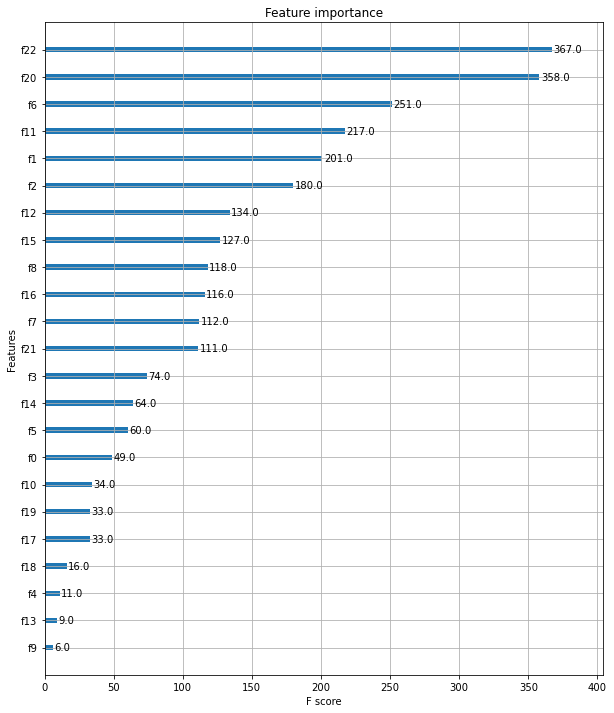

In [15]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper_es, ax=ax)
#claim, join, TOTALPREM, RCBASE_HSHD_INCM, AGE, RESI_COST, CUST_RGST_DAY, VLID_HOSP_OTDA, MAXCRDT, HOSP_SPEC_DVSN

In [73]:
# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력. 미 입력해도 수행에 문제 없음.   
xgb_wrapper_tuning = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=8, eval_metric='error',min_child_weight=3, gamma = 3, colsample_bytree = 0.7 )
xgb_wrapper_tuning.fit(X_train_scaled, y_train_scaled, verbose=True)
w_preds_tuning = xgb_wrapper_tuning.predict(X_test_scaled)
w_pred_proba_tuning = xgb_wrapper_tuning.predict_proba(X_test_scaled)[:, 1]

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# 최종결과(xgboost) 이걸로 가져가

In [74]:
get_clf_eval(y_test_scaled , w_preds_tuning, w_pred_proba_tuning)

오차 행렬
[[102006    163]
 [  1683  28443]]
특이도: 0.9984, 정밀도: 0.9943, 재현율: 0.9441,    F1: 0.9686, AUC:0.9985


In [75]:
from sklearn.model_selection import cross_val_score, cross_validate
#7582

scores = cross_val_score(xgb_wrapper_tuning, X_scaled, y, cv = 3, n_jobs=-1, scoring='f1')
scores

pd.DataFrame(cross_validate(xgb_wrapper_tuning, X_scaled, y, cv =3))

print('교차검증 평균: ', scores.mean())

C:\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as

교차검증 평균:  0.5198078833010277
